In [8]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("DC_Public_Employee_Salary.csv")

In [13]:
df['JOBTITLE'] = df['JOBTITLE'].str.title()
df['hire_date'] = pd.to_datetime(df['HIREDATE_STRING'], errors='coerce')
df['hire_year'] = df['hire_date'].dt.year

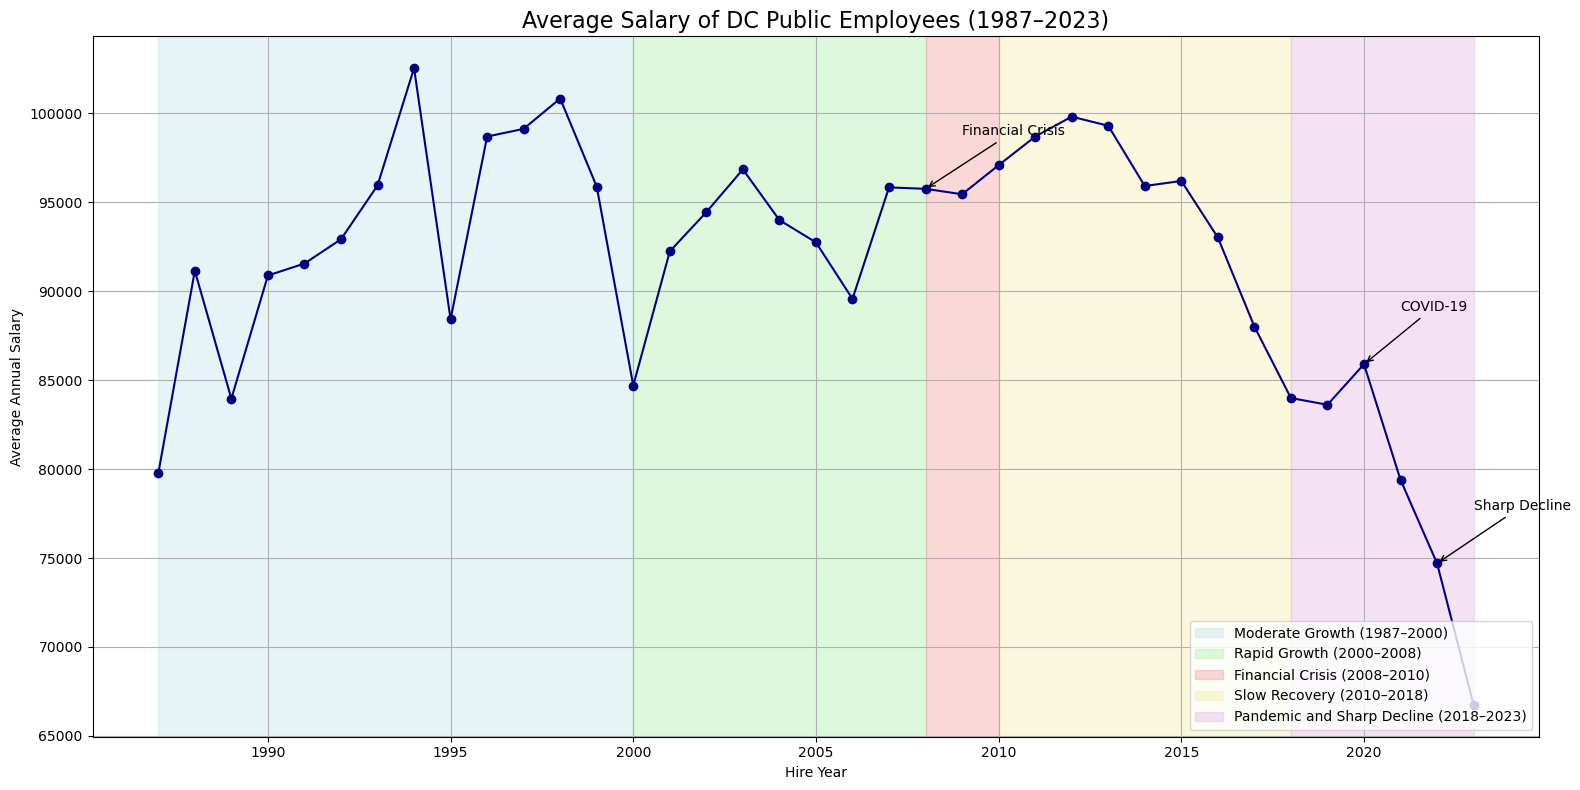

In [33]:
df = df[(df['hire_year'].notnull()) & (df['COMPRATE'].notnull()) & (df['COMPRATE'] > 0)]
df = df[(df['hire_year'] >= 1987) & (df['hire_year'] <= 2023)]
yearly_salary = df.groupby('hire_year')['COMPRATE'].mean().reset_index()
plt.figure(figsize=(16,8))
plt.plot(yearly_salary['hire_year'], yearly_salary['COMPRATE'], marker='o', color='navy')
plt.xlabel('Hire Year')
plt.ylabel('Average Annual Salary')
plt.title('Average Salary of DC Public Employees (1987–2023)', fontsize=16)
plt.grid(True)

plt.axvspan(1987, 2000, color='lightblue', alpha=0.3, label='Moderate Growth (1987–2000)')
plt.axvspan(2000, 2008, color='lightgreen', alpha=0.3, label='Rapid Growth (2000–2008)')
plt.axvspan(2008, 2010, color='lightcoral', alpha=0.3, label='Financial Crisis (2008–2010)')
plt.axvspan(2010, 2018, color='khaki', alpha=0.3, label='Slow Recovery (2010–2018)')
plt.axvspan(2018, 2023, color='plum', alpha=0.3, label='Pandemic and Sharp Decline (2018–2023)')

important_years = {
    2008: 'Financial Crisis',
    2020: 'COVID-19',
    2022: 'Sharp Decline'
}

for year, label in important_years.items():
    if year in yearly_salary['hire_year'].values:
        salary = yearly_salary[yearly_salary['hire_year'] == year]['COMPRATE'].values[0]
        plt.annotate(label,
                     xy=(year, salary),
                     xytext=(year+1, salary+3000),
                     arrowprops=dict(facecolor='black', arrowstyle='->'),
                     fontsize=10,
                     ha='left')

plt.legend(loc='lower right', fontsize=10)
plt.tight_layout()
plt.show()

/var/folders/yk/cc83vdwn3xg3md1lpw0n1wdc0000gn/T/ipykernel_29624/174771826.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_salary_by_job, x='COMPRATE', y='JOBTITLE', palette='viridis')


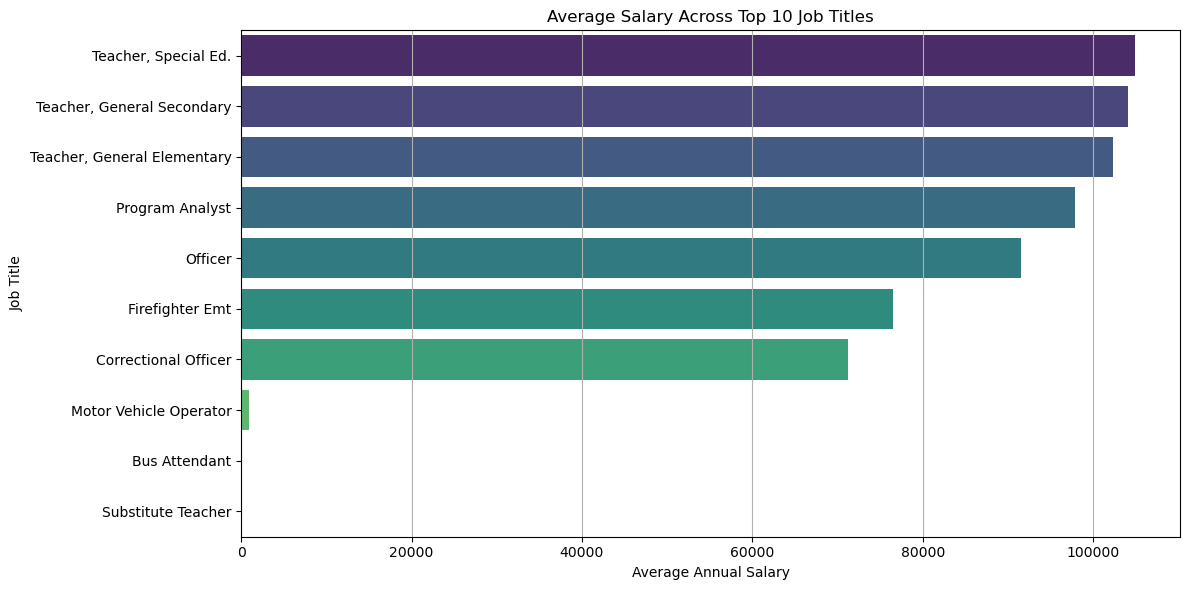

JOBTITLE
Teacher, Special Ed.           104953.061789
Teacher, General Secondary     104093.381703
Teacher, General Elementary    102316.545380
Program Analyst                 97900.519222
Officer                         91484.685345
Firefighter Emt                 76493.019087
Correctional Officer            71271.113039
Motor Vehicle Operator            904.840341
Bus Attendant                      24.793697
Substitute Teacher                 22.449592
Name: COMPRATE, dtype: float64


In [25]:
import seaborn as sns
top_jobs = df['JOBTITLE'].value_counts().head(10).index.tolist()
df_top_jobs = df[df['JOBTITLE'].isin(top_jobs)]

avg_salary_by_job = df_top_jobs.groupby('JOBTITLE')['COMPRATE'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=avg_salary_by_job, x='COMPRATE', y='JOBTITLE', palette='viridis')
plt.xlabel('Average Annual Salary')
plt.ylabel('Job Title')
plt.title('Average Salary Across Top 10 Job Titles')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

avg_salary_by_job = df_top_jobs.groupby('JOBTITLE')['COMPRATE'].mean().sort_values(ascending=False)
print(avg_salary_by_job)

/var/folders/yk/cc83vdwn3xg3md1lpw0n1wdc0000gn/T/ipykernel_29624/1320683938.py:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  growth_rate = pivot_table.pct_change().mean().sort_values(ascending=False)


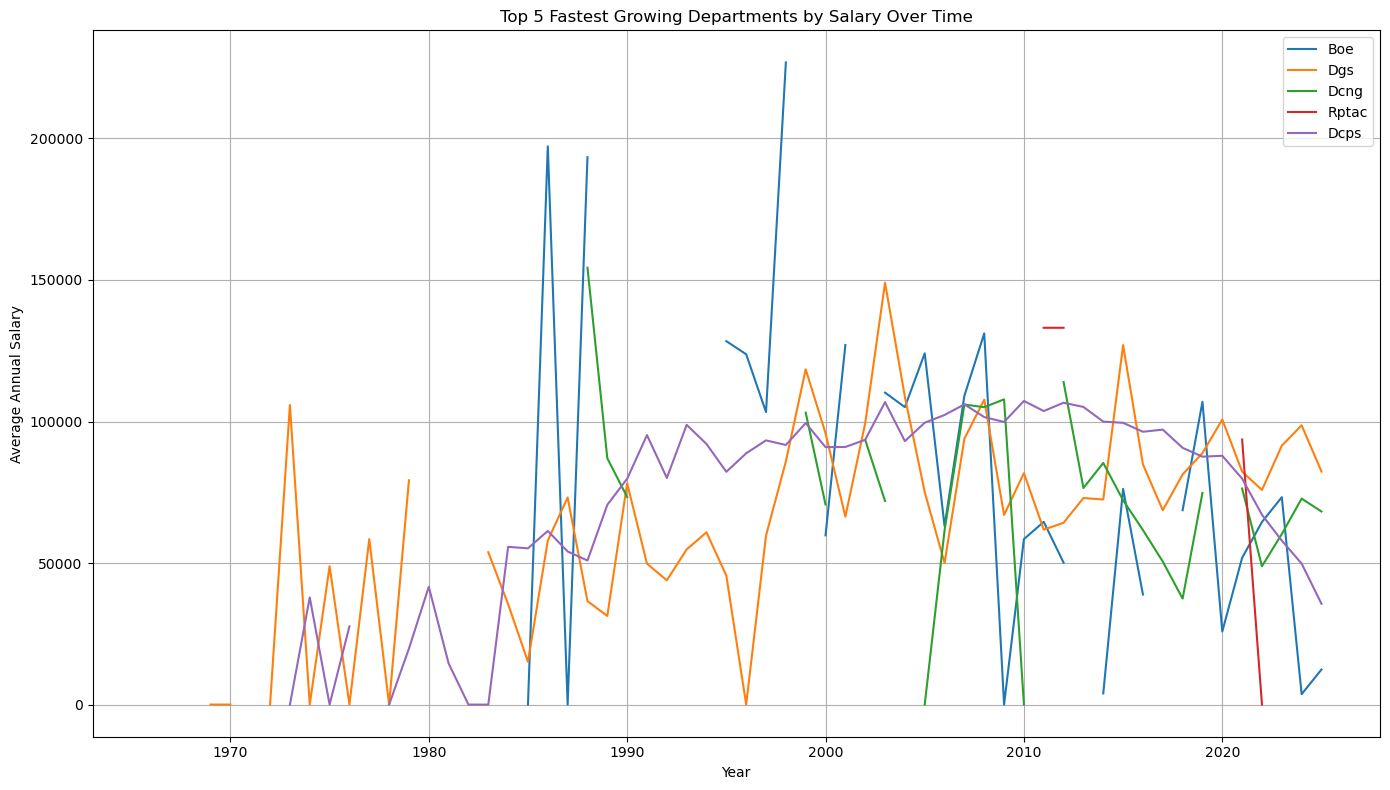

In [17]:
df['DESCRSHORT'] = df['DESCRSHORT'].str.title()
df = df[(df['hire_year'].notnull()) & (df['COMPRATE'].notnull()) & (df['COMPRATE'] > 0)]
dept_year_salary = df.groupby(['hire_year', 'DESCRSHORT'])['COMPRATE'].mean().reset_index()
pivot_table = dept_year_salary.pivot(index='hire_year', columns='DESCRSHORT', values='COMPRATE')
growth_rate = pivot_table.pct_change().mean().sort_values(ascending=False)
top_5_departments = growth_rate.head(5).index.tolist()
plt.figure(figsize=(14,8))
for dept in top_5_departments:
    plt.plot(pivot_table.index, pivot_table[dept], label=dept)

plt.xlabel('Year')
plt.ylabel('Average Annual Salary')
plt.title('Top 5 Fastest Growing Departments by Salary Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

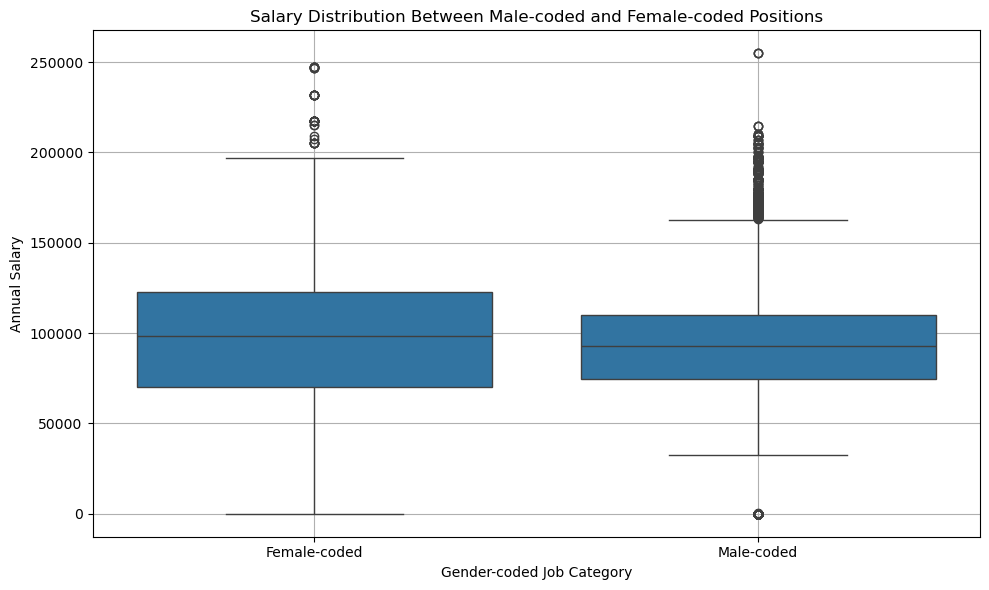

gender_coding
Female-coded    91091.348582
Male-coded      95819.161738
Name: COMPRATE, dtype: float64


In [19]:
female_coded_jobs = ['Nurse', 'Teacher', 'Clerk', 'Assistant', 'Secretary', 'Social Worker']
male_coded_jobs = ['Police Officer', 'Firefighter', 'Engineer', 'Inspector', 'Supervisor', 'Investigator']
def classify_job(job):
    if any(female_job in job for female_job in female_coded_jobs):
        return 'Female-coded'
    elif any(male_job in job for male_job in male_coded_jobs):
        return 'Male-coded'
    else:
        return 'Other'

df['gender_coding'] = df['JOBTITLE'].apply(classify_job)
df_gender_jobs = df[df['gender_coding'].isin(['Female-coded', 'Male-coded'])]

plt.figure(figsize=(10,6))
sns.boxplot(data=df_gender_jobs, x='gender_coding', y='COMPRATE')
plt.xlabel('Gender-coded Job Category')
plt.ylabel('Annual Salary')
plt.title('Salary Distribution Between Male-coded and Female-coded Positions')
plt.grid(True)
plt.tight_layout()
plt.show()

avg_salary_by_gender_code = df_gender_jobs.groupby('gender_coding')['COMPRATE'].mean()
print(avg_salary_by_gender_code)

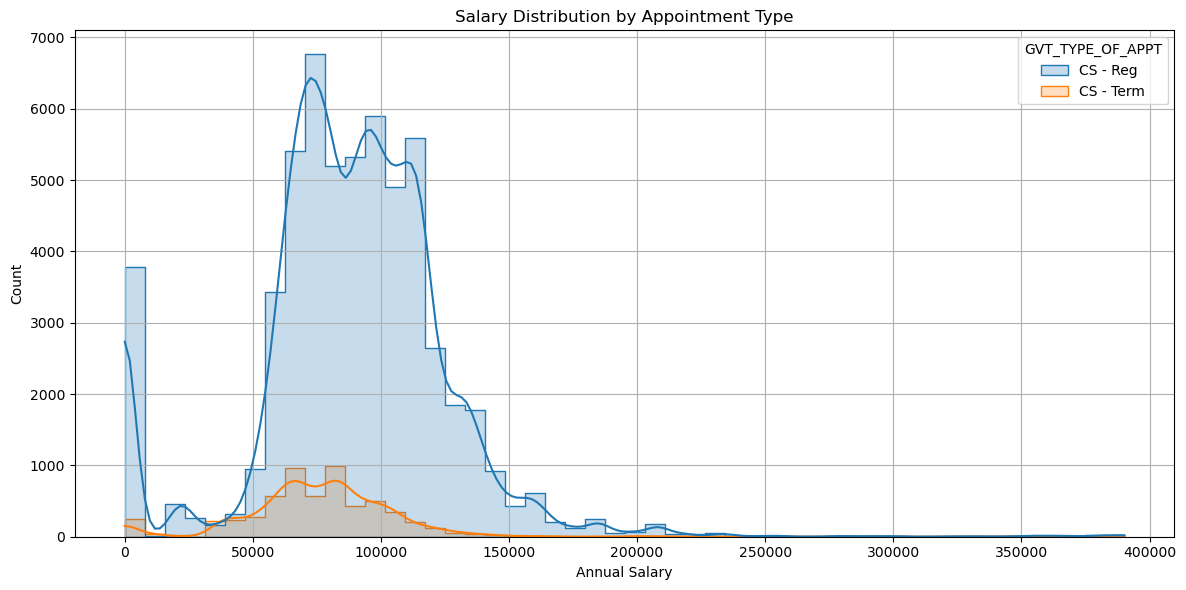

GVT_TYPE_OF_APPT
CS - Reg     88533.964605
CS - Term    75468.564334
Name: COMPRATE, dtype: float64


NameError: name 'ttest_ind' is not defined

In [48]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.histplot(data=df_filtered, x='COMPRATE', hue='GVT_TYPE_OF_APPT', bins=50, kde=True, element='step')
plt.xlabel('Annual Salary')
plt.title('Salary Distribution by Appointment Type')
plt.grid(True)
plt.tight_layout()
plt.show()

avg_salary_by_type = df_filtered.groupby('GVT_TYPE_OF_APPT')['COMPRATE'].mean()
print(avg_salary_by_type)
reg_salaries = df_filtered[df_filtered['GVT_TYPE_OF_APPT'] == 'CS - Reg']['COMPRATE']
term_salaries = df_filtered[df_filtered['GVT_TYPE_OF_APPT'] == 'CS - Term']['COMPRATE']
t_stat, p_value = ttest_ind(reg_salaries, term_salaries, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.4f}")